In [40]:
import pandas as pd

In [41]:
boc_forex_names = pd.read_csv("/Volumes/GoogleDrive/My Drive/Forecasting/bootcamp_datasets/boc_exchange/column_names.csv")
boc_forex_names

,id,label,description
0,IEXE1601.CL,AUD_CLOSE,Australian dollar (close)
1,IEXE0301.CL,DKK_CLOSE,Danish krone (close)
2,EUROCAE01.CL,EUR_CLOSE,European Euro (close)
3,IEXE1401.CL,HKD_CLOSE,Hong Kong dollar (close)
4,IEXE0701.CL,JPY_CLOSE,Japanese yen (close)
5,IEXE2001.CL,MXN_CLOSE,Mexican peso (close)
6,IEXE1901.CL,NZD_CLOSE,New Zealand dollar (close)
7,IEXE0901.CL,NOK_CLOSE,Norwegian krone (close)
8,IEXE1001.CL,SEK_CLOSE,Swedish krona (close)
9,IEXE1101.CL,CHF_CLOSE,Swiss franc (close)


In [42]:
column_name_map = boc_forex_names[['id', 'label']].set_index('id').to_dict()['label']

In [43]:
boc_forex_df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Forecasting/bootcamp_datasets/boc_exchange/LEGACY_CLOSING_RATES.csv")
boc_forex_df

,date,IEXE1601.CL,IEXE0301.CL,EUROCAE01.CL,IEXE1401.CL,IEXE0701.CL,IEXE2001.CL,IEXE1901.CL,IEXE0901.CL,IEXE1001.CL,IEXE1101.CL,IEXE1201.CL,IEXE0102,IEXE0103,IEXE0104,IEXE0106
0,2007-05-01,0.9200,0.2000,1.5100,0.141970,0.009271,0.10000,0.8200,0.1860,0.1700,0.9100,2.2199,1.1105,1.1116,1.1048,1.1075
1,2007-05-02,0.9100,0.2000,1.5100,0.141740,0.009232,0.10000,0.8200,0.1854,0.1700,0.9100,2.2055,1.1087,1.1115,1.1066,1.1057
2,2007-05-03,0.9100,0.2000,1.5000,0.141496,0.009190,0.10000,0.8100,0.1847,0.1600,0.9100,2.1999,1.1066,1.1086,1.1054,1.1036
3,2007-05-04,0.9100,0.2000,1.5100,0.141616,0.009218,0.10000,0.8100,0.1854,0.1600,0.9100,2.2075,1.1075,1.1077,1.1032,1.1046
4,2007-05-07,0.9100,0.2000,1.5000,0.140908,0.009177,0.10000,0.8100,0.1843,0.1600,0.9100,2.1957,1.1018,1.1042,1.1007,1.0988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2017-04-24,1.0218,0.1974,1.4684,0.173684,0.012310,0.07215,0.9477,0.1579,0.1525,1.3568,1.7280,1.3511,1.3521,1.3425,1.3493
2500,2017-04-25,1.0224,0.1994,1.4837,0.174374,0.012210,0.07183,0.9426,0.1586,0.1548,1.3661,1.7407,1.3565,1.3626,1.3565,1.3547
2501,2017-04-26,1.0176,0.1995,1.4847,0.174965,0.012260,0.07098,0.9382,0.1585,0.1554,1.3707,1.7493,1.3612,1.3623,1.3543,1.3594
2502,2017-04-27,1.0176,0.1992,1.4815,0.175103,0.012250,0.07151,0.9369,0.1590,0.1543,1.3704,1.7584,1.3624,1.3670,1.3574,1.3605


In [44]:
boc_forex_df = boc_forex_df.rename(column_name_map, axis=1)
boc_forex_df = boc_forex_df[['date'] + [col for col in boc_forex_df if col.endswith('_CLOSE')]]
boc_forex_df

,date,AUD_CLOSE,DKK_CLOSE,EUR_CLOSE,HKD_CLOSE,JPY_CLOSE,MXN_CLOSE,NZD_CLOSE,NOK_CLOSE,SEK_CLOSE,CHF_CLOSE,GBP_CLOSE,USD_CLOSE
0,2007-05-01,0.9200,0.2000,1.5100,0.141970,0.009271,0.10000,0.8200,0.1860,0.1700,0.9100,2.2199,1.1105
1,2007-05-02,0.9100,0.2000,1.5100,0.141740,0.009232,0.10000,0.8200,0.1854,0.1700,0.9100,2.2055,1.1087
2,2007-05-03,0.9100,0.2000,1.5000,0.141496,0.009190,0.10000,0.8100,0.1847,0.1600,0.9100,2.1999,1.1066
3,2007-05-04,0.9100,0.2000,1.5100,0.141616,0.009218,0.10000,0.8100,0.1854,0.1600,0.9100,2.2075,1.1075
4,2007-05-07,0.9100,0.2000,1.5000,0.140908,0.009177,0.10000,0.8100,0.1843,0.1600,0.9100,2.1957,1.1018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2017-04-24,1.0218,0.1974,1.4684,0.173684,0.012310,0.07215,0.9477,0.1579,0.1525,1.3568,1.7280,1.3511
2500,2017-04-25,1.0224,0.1994,1.4837,0.174374,0.012210,0.07183,0.9426,0.1586,0.1548,1.3661,1.7407,1.3565
2501,2017-04-26,1.0176,0.1995,1.4847,0.174965,0.012260,0.07098,0.9382,0.1585,0.1554,1.3707,1.7493,1.3612
2502,2017-04-27,1.0176,0.1992,1.4815,0.175103,0.012250,0.07151,0.9369,0.1590,0.1543,1.3704,1.7584,1.3624


<AxesSubplot:>

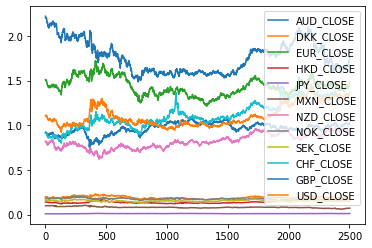

In [45]:
boc_forex_df.plot()

In [46]:
boc_forex_df.to_csv("/Volumes/GoogleDrive/My Drive/Forecasting/bootcamp_datasets/boc_exchange/dataset.csv", index=False)

In [47]:
pd.read_csv("/Volumes/GoogleDrive/My Drive/Forecasting/bootcamp_datasets/boc_exchange/dataset.csv")

,date,AUD_CLOSE,DKK_CLOSE,EUR_CLOSE,HKD_CLOSE,JPY_CLOSE,MXN_CLOSE,NZD_CLOSE,NOK_CLOSE,SEK_CLOSE,CHF_CLOSE,GBP_CLOSE,USD_CLOSE
0,2007-05-01,0.9200,0.2000,1.5100,0.141970,0.009271,0.10000,0.8200,0.1860,0.1700,0.9100,2.2199,1.1105
1,2007-05-02,0.9100,0.2000,1.5100,0.141740,0.009232,0.10000,0.8200,0.1854,0.1700,0.9100,2.2055,1.1087
2,2007-05-03,0.9100,0.2000,1.5000,0.141496,0.009190,0.10000,0.8100,0.1847,0.1600,0.9100,2.1999,1.1066
3,2007-05-04,0.9100,0.2000,1.5100,0.141616,0.009218,0.10000,0.8100,0.1854,0.1600,0.9100,2.2075,1.1075
4,2007-05-07,0.9100,0.2000,1.5000,0.140908,0.009177,0.10000,0.8100,0.1843,0.1600,0.9100,2.1957,1.1018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2017-04-24,1.0218,0.1974,1.4684,0.173684,0.012310,0.07215,0.9477,0.1579,0.1525,1.3568,1.7280,1.3511
2500,2017-04-25,1.0224,0.1994,1.4837,0.174374,0.012210,0.07183,0.9426,0.1586,0.1548,1.3661,1.7407,1.3565
2501,2017-04-26,1.0176,0.1995,1.4847,0.174965,0.012260,0.07098,0.9382,0.1585,0.1554,1.3707,1.7493,1.3612
2502,2017-04-27,1.0176,0.1992,1.4815,0.175103,0.012250,0.07151,0.9369,0.1590,0.1543,1.3704,1.7584,1.3624
